# Matplotlib Examples

## 1. Setup

### 1.1 Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.cluster import KMeans

In [2]:
import matplotlib as mpl
print(f'Matplotlib backend is {mpl.get_backend()}')
print(f'Matplotlib path is ~/{os.path.relpath(mpl.__path__[0], start=os.getenv("HOME"))}')
print(f'Matplotlib version is {mpl.__version__}')
print(f'Numpy version is {mpl.__version__numpy__}')

Matplotlib backend is module://ipykernel.pylab.backend_inline
Matplotlib path is ~/anaconda3/lib/python3.6/site-packages/matplotlib
Matplotlib version is 2.2.3
Numpy version is 1.7.1


### 1.2 Data

#### 1.2.1 Data Generation

In [3]:
# Data for x-y plot
def generate_xy_data(n=51):
    x = np.linspace(0, 2, n)
    y = np.sin(np.pi*x)
    return x, y

# Data for Normal distribution
def create_normaldistribution(mu=-3.0, sigma=2.0, n=51):
    """
    Generates data for a normal distribution within the
    3 sigma limits of mu
    """
    x = np.linspace(mu-3.0*sigma,mu+3.0*sigma,n)
    y = np.exp(-(x-mu)**2 / (2.0*sigma**2))/(np.sqrt(2.0*np.pi)*sigma)
    return x, y, mu, sigma

# Data for histogram plot
def generate_bivariate_distribution(n=1000, seed=45):
    np.random.seed(seed)
    i = np.random.randint(0,2,n)
    x = np.random.normal(-2.0, 0.8, n)*i + \
        np.random.normal(2.0,0.8,n)*(1-i)
    return x

The trapezium rule for the points $y_1, \dots, y_{(n-1)/2+1}$ is calculated using `numpy.trapz()` as follows (**Note** $n$ is assumed to be odd, points $x_i$ are assumed to be evenly spaced):

In [4]:
def area_under_curve(x, y):
    """
    Calculates the area under the curve via the trapezium rule
    """
    n = x.shape[0]
    n = (n-1)//2+1
    area = np.trapz(y[:n], dx=x[1])
    return area.item()

## 2. Basic Plots

### 2.1 Plotting sin(πx) and the area under the curve

The area under the curve for $\sin\left(\pi x\right)$ is

$\int_0^1 \sin(\pi x) = [-\frac{1}{\pi}\cos(\pi x)]_0^1$

$= -\frac{1}{\pi}[\cos(\pi) - \cos(0)]$

$= -\frac{1}{\pi}[-1 - 1]$

$= \frac{2}{\pi}$

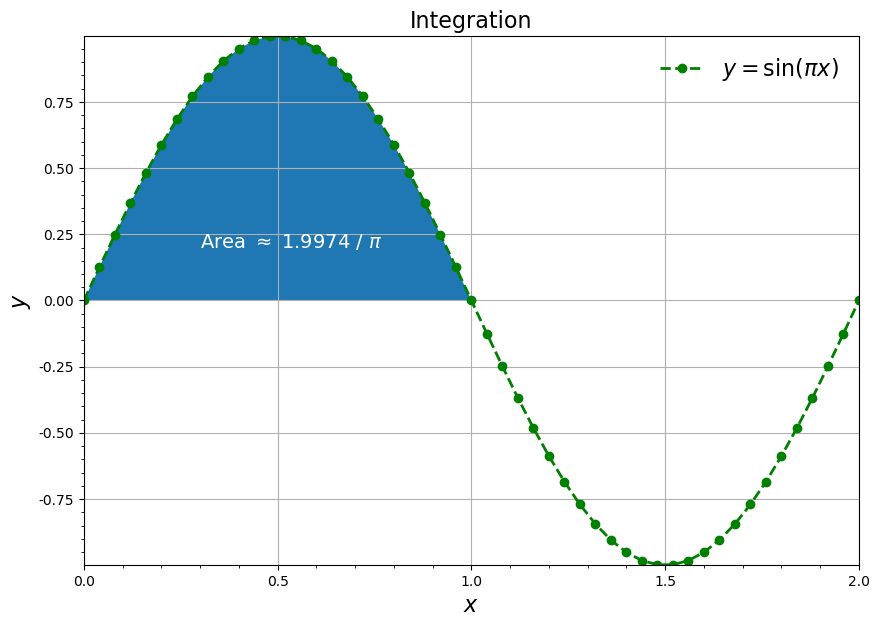

In [5]:
def basic_plot(ax, x, y, title, label, fs=16):
    lines = ax.plot(x, y, c='g', marker='o', lw=2, linestyle='--',
                    label=label)
    ax.grid(True)
    ax.set_title(title, fontsize=fs)
    ax.set_xlabel('$x$', fontsize=fs,color='black')
    ax.set_ylabel('$y$', fontsize=fs,color='black')
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
    ax.legend(loc=1, frameon=False, fontsize=fs)
    
    # Format axes
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_locator(MultipleLocator(0.25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    return fig, ax


def draw_area_under_curve(ax, x, y, fs=14):
    area = area_under_curve(x, y)
    ax.annotate(r"Area $\approx$ %.4f / $\pi$" % (area*np.pi),
                xy=(0.3,0.2), fontsize=fs, color='white')
    ax.fill_between(x, y, 0.0, where=y>0.0, interpolate=True)


x, y = generate_xy_data()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7),
                       dpi=100, facecolor='w', edgecolor='k')
basic_plot(ax, x, y, title='Integration',
           label='$y = \sin(\pi x)$')
draw_area_under_curve(ax, x, y)
fig.savefig('sin_x.png', figsize=(10,7), dpi=300)

### 2.2 Plotting the normal distribution

The **Normal (Gaussian) Distribution** is given by:

$x^{(i)} \sim \mathcal{N}(\mu,\sigma^2)$

The formula for the Gaussian density is:

$p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$

**Maximum likelihood estimators** for $\mu$ and $\sigma$ are:

$\mu = \frac{1}{m}\sum\limits_{i=1}^m x^{(i)}$

$\sigma = \frac{1}{m}\sum\limits_{i=1}^m (x^{(i)}-\mu)^2$ or $\frac{1}{m-1}\sum\limits_{i=1}^m (x^{(i)}-\mu)^2$

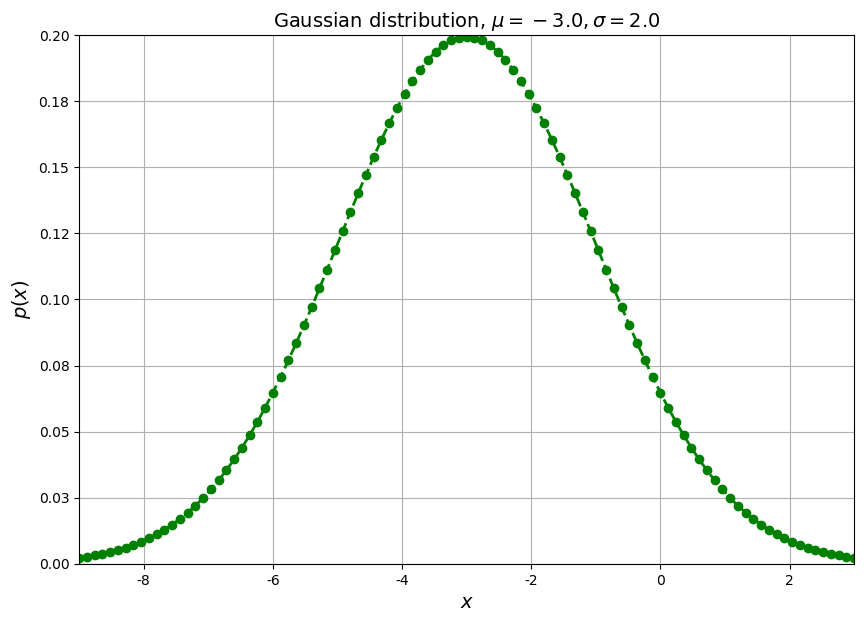

In [6]:
def plot_gaussian(params, filename=None, fs=14):
    (x,y,mu,sigma) = params
    fig, ax = plt.subplots(1, 1, figsize=(10,7), dpi=100,
                           facecolor='w', edgecolor='k')
    ax.grid(True)
    ax.set_title(f"Gaussian distribution, $\mu={mu}, \sigma={sigma}$", fontsize=fs)
    ax.set_xlabel('$x$', fontsize=fs, color='black')
    ax.set_ylabel('$p(x)$', fontsize=fs, color='black')
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(np.round(y.min(), 2), np.round(y.max(), 2))
    lines = plt.plot(x, y, c='g', marker='o', lw=2, linestyle='--')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    if (filename):
        plt.savefig(filename, figsize=(10,7), dpi=300)

plot_gaussian(create_normaldistribution(mu=-3.,sigma=2.,n=101))

### 2.3 Plotting Histograms

[-1.9896414  2.0176039]


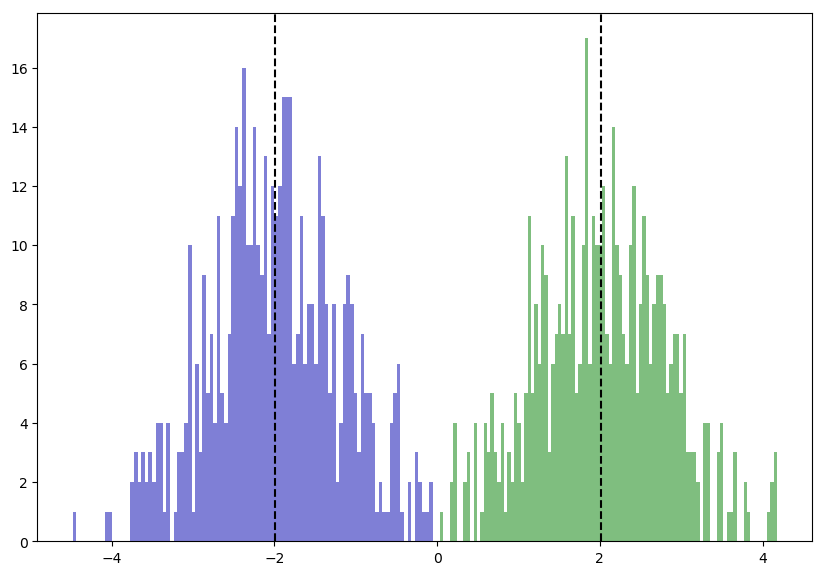

In [7]:
def find_kmeans_centers(x, bins):
    kmeans = KMeans(n_clusters=2).fit(x.reshape(-1, 1))
    return {
        'labels': kmeans.labels_,
        'centers': kmeans.cluster_centers_
    }

n = 1000; bins = n//10
x = generate_bivariate_distribution()
h = np.histogram(x, bins=bins)
h = np.vstack((0.5*(h[1][:-1]+h[1][1:]),h[0])).T
km = find_kmeans_centers(x, bins)
ctrs = km['centers']
print(ctrs.flatten())
x1 = x[km['labels']==0]
x2 = x[km['labels']==1]

fig, ax = plt.subplots(1, 1, figsize=(10,7), dpi=100,
                       facecolor='w', edgecolor='k')
_ = ax.hist(x1, color='#0000af', alpha=0.5, bins=bins)
_ = ax.hist(x2, color='#007f00', alpha=0.5, bins=bins)
for ctr in ctrs:
    ax.axvline(ctr, ls='--', color='black')